In [1]:
from data_generator import dgen,pack_by_value,downscale_nsave
from dict2obj import Dict2Obj
from fit_pca import plot_images_table

import time

%load_ext autoreload
%autoreload 2

In [15]:
path = "img\\seq24_09\\small\\small"
experiment = Dict2Obj({
    "start_time":time.mktime((2018,9,24,19,39,4,0,0,0)),
    "tick":10,
    "transition_dur":4,
})

#downscale_nsave(path,'small',factor=0.2)

In [17]:
data = list(dgen(path,experiment,start=0,limit = -200))
packed = pack_by_value(data)

Returned 182, skipped 183 files
Packed to 26 buckets, lengths: [6, 7, 7, 7, 8, 7, 8, 7, 7, 6, 7, 7, 7, 7, 7, 8, 7, 8, 8, 7, 6, 7, 6, 6, 7, 7]


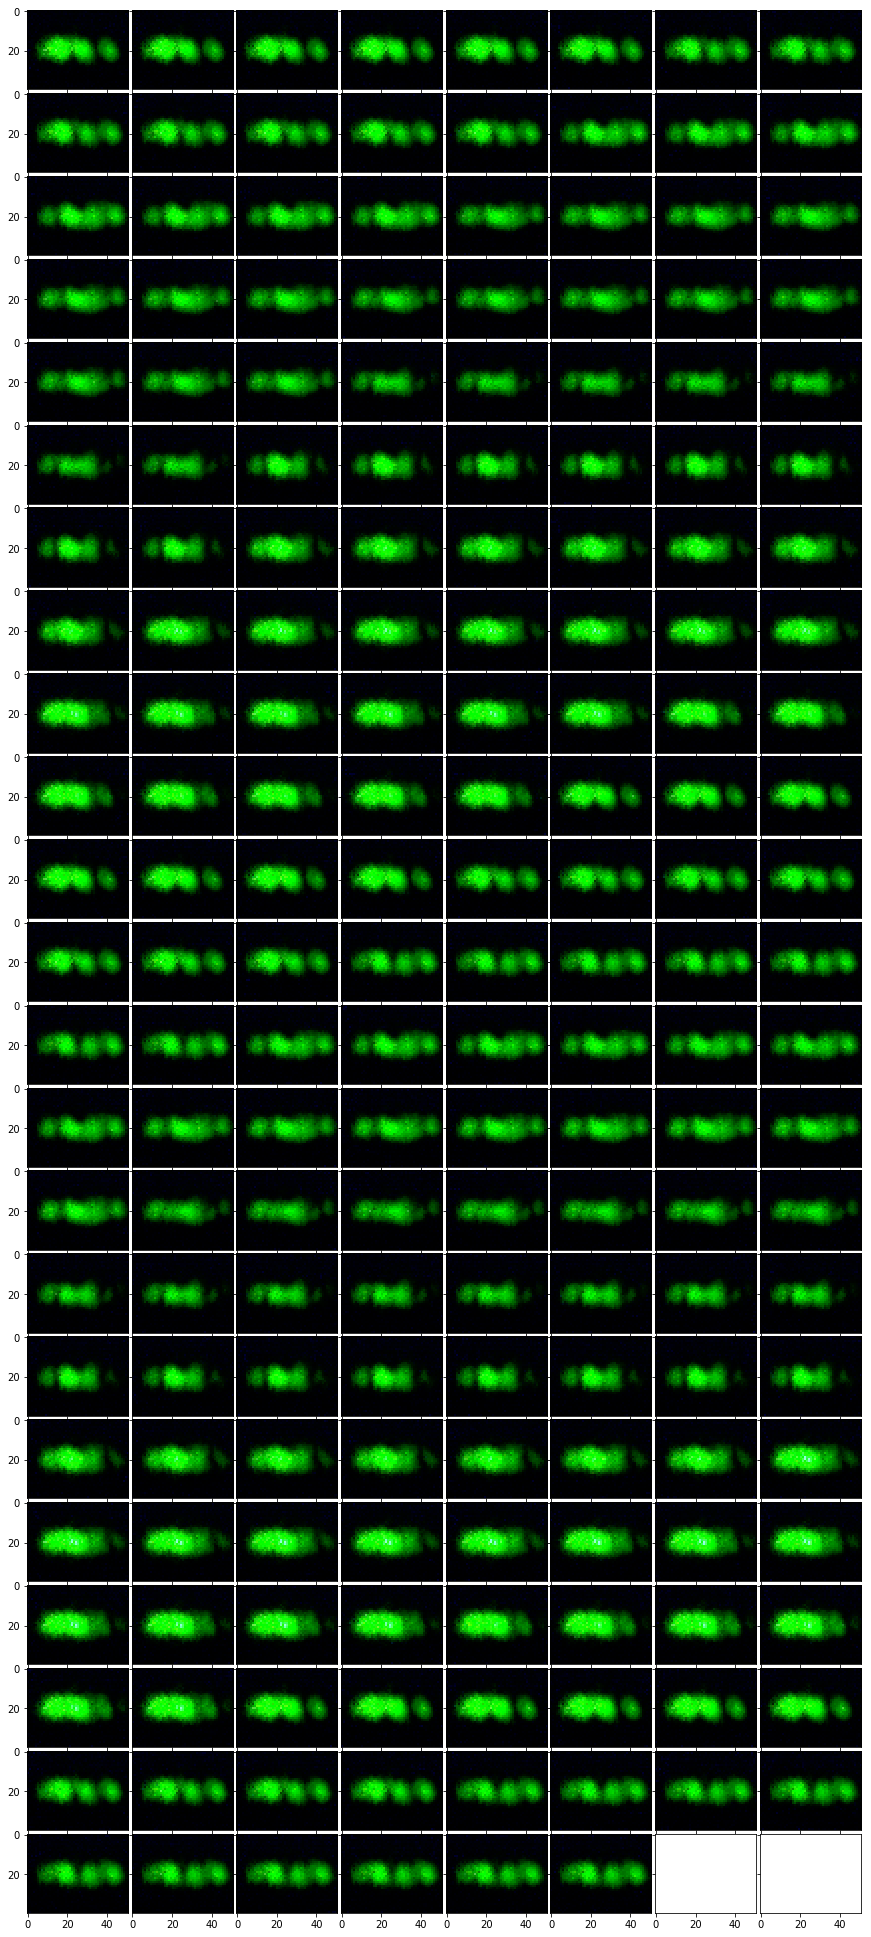

In [18]:
imgs = [d[0] for d in data]
plot_images_table(imgs,figsize=(15,35))